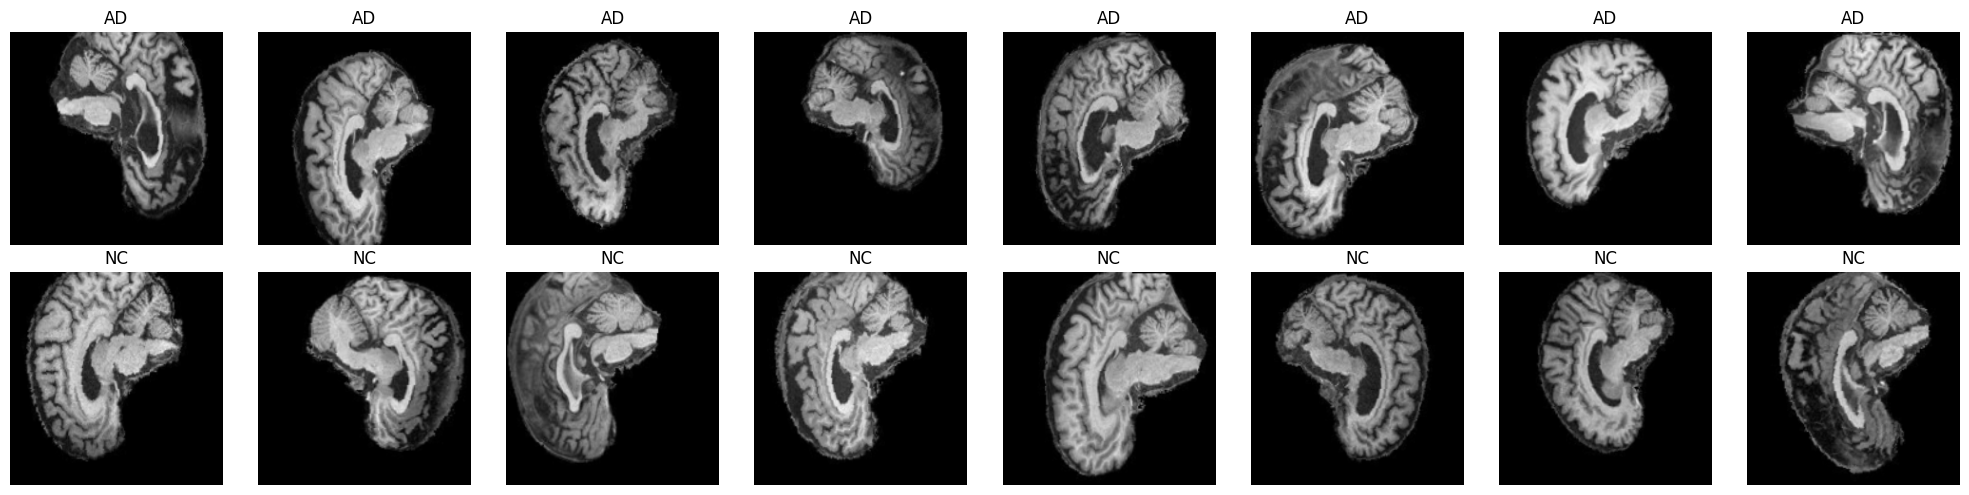

In [12]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torchvision

# Example paths (you can replace these with your actual dataset paths)
train_dir = "./ADNI/AD_NC/train"
test_dir = "./ADNI/AD_NC/test"

# Applying transforms including resizing and converting to tensor
image_size = 224
data_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.CenterCrop(image_size // 1.2),  # Center crop
    transforms.RandomHorizontalFlip(),  # Horizontal flip for augmentation
    transforms.RandomRotation(degrees=10),  # Slight random rotation
    transforms.RandomResizedCrop(image_size, scale=(0.8, 1.0)),  # Randomly crop and resize
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.1156, 0.1156, 0.1156], std=[0.2229, 0.2229, 0.2229])  # Assuming these are your normalization values
])

train_data = torchvision.datasets.ImageFolder(root=train_dir, transform=data_transforms)
test_data = torchvision.datasets.ImageFolder(root=test_dir, transform=data_transforms)

def unnormalize(img_tensor, mean, std):
    """
    Unnormalize a tensor image with the given mean and std deviation.
    
    Parameters:
        img_tensor (Tensor): The normalized image tensor.
        mean (list): List of mean values used for normalization.
        std (list): List of std values used for normalization.
    
    Returns:
        Unnormalized image tensor.
    """
    img_tensor = img_tensor.clone()  # Avoid modifying the original tensor
    for t, m, s in zip(img_tensor, mean, std):
        t.mul_(s).add_(m)  # Un-normalize
    return img_tensor

def display_class_images_transformed(dataset, num_images=8):
    """
    Displays a grid of transformed images from the dataset. One row per class.
    
    Parameters:
        dataset (ImageFolder): The dataset containing images and labels.
        num_images (int): The number of images to display per class.
    """
    # Shuffle the dataset indices
    indices = list(range(len(dataset)))
    random.shuffle(indices)

    ad_images = []
    nc_images = []

    # Randomly collect num_images for each class (AD = 0, NC = 1)
    for idx in indices:
        image, label = dataset[idx]
        if label == 0 and len(ad_images) < num_images:  # Class 0 (AD)
            ad_images.append(image)
        elif label == 1 and len(nc_images) < num_images:  # Class 1 (NC)
            nc_images.append(image)
        if len(ad_images) >= num_images and len(nc_images) >= num_images:
            break

    # Unnormalize images for display
    mean = [0.1156, 0.1156, 0.1156]  # Example mean values
    std = [0.2229, 0.2229, 0.2229]  # Example std values

    # Plotting AD class (0) and NC class (1)
    fig, axs = plt.subplots(2, num_images, figsize=(20, 5))

    for i in range(num_images):
        # Unnormalize and convert tensor back to image format (H, W, C) for display
        ad_image = unnormalize(ad_images[i], mean, std).permute(1, 2, 0).numpy()  # Change shape from (C, H, W) to (H, W, C)
        nc_image = unnormalize(nc_images[i], mean, std).permute(1, 2, 0).numpy()  # Same for NC

        # Clip pixel values to [0,1] for display
        ad_image = np.clip(ad_image, 0, 1)
        nc_image = np.clip(nc_image, 0, 1)

        # AD class (top row)
        axs[0, i].imshow(ad_image)
        axs[0, i].set_title('AD')
        axs[0, i].axis('off')

        # NC class (bottom row)
        axs[1, i].imshow(nc_image)
        axs[1, i].set_title('NC')
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage to display the transformed images:
display_class_images_transformed(train_data, num_images=8)



In [1]:
import torch
import torchvision
import numpy as np

In [3]:

train_dir = "./ADNI/AD_NC/train"
test_dir = "./ADNI/AD_NC/test"


train_data = torchvision.datasets.ImageFolder(root= train_dir)
test_data = torchvision.datasets.ImageFolder(root= test_dir)

In [33]:
print(len(train_data), train_data.class_to_idx, train_data.classes)
print(len(test_data), test_data.class_to_idx, test_data.classes)
print(np.array(train_data[0][0])[:, :, 0].min())

21520 {'AD': 0, 'NC': 1} ['AD', 'NC']
9000 {'AD': 0, 'NC': 1} ['AD', 'NC']
0


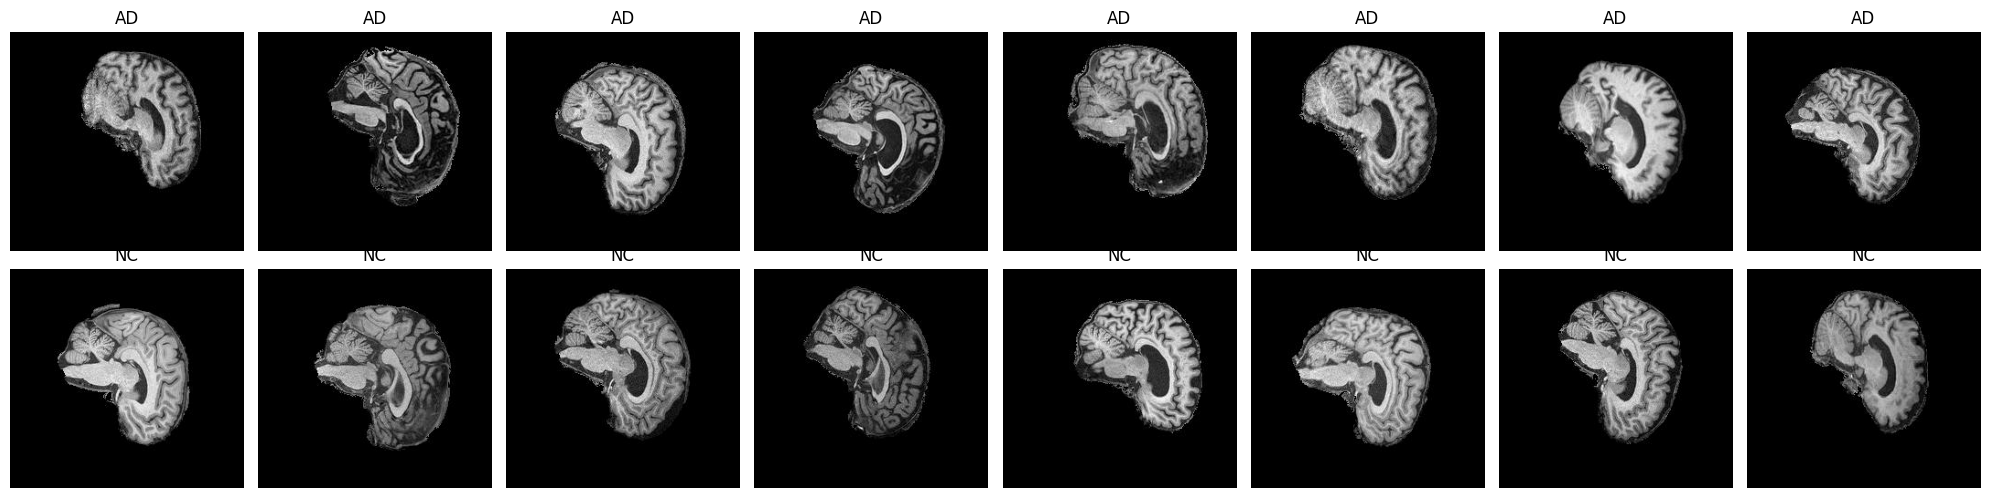

In [34]:
import matplotlib.pyplot as plt
import random

def display_class_images(dataset, num_images=8):
    """
    Displays a grid of images from the dataset. One row per class.
    
    Parameters:
        dataset (ImageFolder): The dataset containing images and labels.
        num_images (int): The number of images to display per class.
    """
    # Shuffle the dataset indices
    indices = list(range(len(dataset)))
    random.shuffle(indices)

    ad_images = []
    nc_images = []

    # Randomly collect num_images for each class (AD = 0, NC = 1)
    for idx in indices:
        image, label = dataset[idx]
        if label == 0 and len(ad_images) < num_images:  # Class 0 (AD)
            ad_images.append(image)
        elif label == 1 and len(nc_images) < num_images:  # Class 1 (NC)
            nc_images.append(image)
        if len(ad_images) >= num_images and len(nc_images) >= num_images:
            break

    # Plotting AD class (0) and NC class (1)
    fig, axs = plt.subplots(2, num_images, figsize=(20, 5))

    for i in range(num_images):
        # AD class (top row)
        axs[0, i].imshow(ad_images[i])
        axs[0, i].set_title('AD')
        axs[0, i].axis('off')

        # NC class (bottom row)
        axs[1, i].imshow(nc_images[i])
        axs[1, i].set_title('NC')
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
display_class_images(train_data, num_images=8)


#### Applying basic transformations

#### Data augmentation stuff
- We notice that, the brain is not always center image so naively doing crops and centering could be quite dangerous!!
However, transformers perform better as they look at 16x16 image patches, so cropping it to 224x224 seems like a decent idea. We also see below that there are still
images that are fine with this cropping so yes...

Also, let's do data augmentation to increase generalisation later;
- rotation
- flipping, etc..

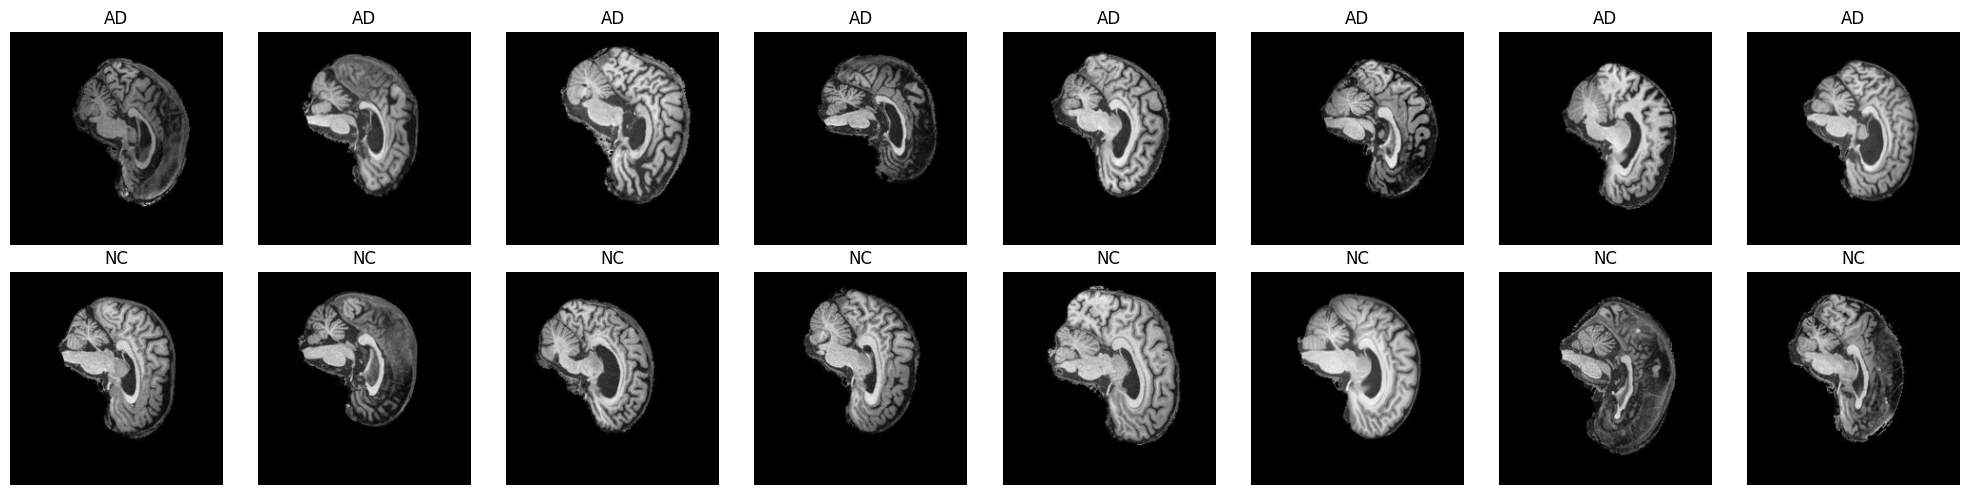

In [35]:
from torchvision import transforms

image_size = 224
data_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(), # ToTensor converts things into [Channel, Height, Width]
])

train_data = torchvision.datasets.ImageFolder(root= train_dir, transform= data_transforms)
test_data = torchvision.datasets.ImageFolder(root= test_dir, transform = data_transforms)



def display_class_images(dataset, num_images=8):
    """
    Displays a grid of images from the dataset. One row per class.
    
    Parameters:
        dataset (ImageFolder): The dataset containing images and labels.
        num_images (int): The number of images to display per class.
    """
    # Shuffle the dataset indices
    indices = list(range(len(dataset)))
    random.shuffle(indices)

    ad_images = []
    nc_images = []

    # Randomly collect num_images for each class (AD = 0, NC = 1)
    for idx in indices:
        image, label = dataset[idx]
        if label == 0 and len(ad_images) < num_images:  # Class 0 (AD)
            ad_images.append(image)
        elif label == 1 and len(nc_images) < num_images:  # Class 1 (NC)
            nc_images.append(image)
        if len(ad_images) >= num_images and len(nc_images) >= num_images:
            break

    # Plotting AD class (0) and NC class (1)
    fig, axs = plt.subplots(2, num_images, figsize=(20, 5))

    for i in range(num_images):
        # Convert tensor back to image format (H, W, C) for display
        ad_image = ad_images[i].permute(1, 2, 0).numpy()  # Change shape from (C, H, W) to (H, W, C)
        nc_image = nc_images[i].permute(1, 2, 0).numpy()  # Same for NC

        # AD class (top row)
        axs[0, i].imshow(ad_image)
        axs[0, i].set_title('AD')
        axs[0, i].axis('off')

        # NC class (bottom row)
        axs[1, i].imshow(nc_image)
        axs[1, i].set_title('NC')
        axs[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
display_class_images(train_data, num_images=8)

In [61]:
### Calculating the mean and std of the dataset!!
from tqdm import tqdm  # Import tqdm for progress tracking
from torch.utils.data import DataLoader
def get_mean_std(loader: DataLoader):
    mean = torch.zeros(3)
    squared_mean = torch.zeros(3)
    N = 0 # Number of batches
    for images, _ in tqdm(loader, desc="Computing mean and std"): 
        # Images are [32, 3, 224, 224]
        
        num_batches, num_channels, height, width = images.shape
        N += num_batches

        mean += images.sum(dim=(0,2,3)) # Mean is size [3], i.e it's the mean sum over each channel [R, G, B]...
        squared_mean += (images ** 2).sum(dim=(0,2,3)) # Accumulate squared mean
    mean /= N * height * width # Divide the summed mean by the number of pixels we've ever seen (i.e mean is on a per pixel basis)

    squared_mean /= N * height * width # Same with squared mean
    
    # Get std
    std = torch.sqrt((squared_mean - mean ** 2)) # Std per pixel
    
    return mean, std

image_size = 224
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_data = torchvision.datasets.ImageFolder(root= train_dir, transform= data_transforms)

BATCH_SIZE = 32
loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True) # Transform it to tensor instead of leaving it as PIL images..
print(len(loader))
mean, std = get_mean_std(loader)
print(mean, std)

## We get mean:tensor([0.1156, 0.1156, 0.1156])
# std: tensor([0.2229, 0.2229, 0.2229])

673


Computing mean and std: 100%|██████████| 673/673 [00:44<00:00, 14.96it/s]

tensor([0.1156, 0.1156, 0.1156]) tensor([0.2229, 0.2229, 0.2229])


## Now we actually do the Dataset Stuff!

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

train_dir = "./ADNI/AD_NC/train"
test_dir = "./ADNI/AD_NC/test"


mean = torch.Tensor([0.1156, 0.1156, 0.1156]) 
std =  torch.Tensor([0.2229, 0.2229, 0.2229])
# Define batch size
BATCH_SIZE = 32  # You can adjust this based on your GPU memory
num_workers = 4
image_size = 224
train_fraction = 0.9 # What percentage is used for training vs validation (0.9 is 90%).

data_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(), # For augmentation and better generalisation
    transforms.RandomRotation(degrees=10),  # Random rotation between -10 and +10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std) # Mean and std from previous cell
])



# Load the full train dataset
train_data = datasets.ImageFolder(root=train_dir, transform=data_transforms)

# Split the train_data into training and validation datasets
train_size = int(train_fraction * len(train_data))  
val_size = len(train_data) - train_size  
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

# Load the test dataset (no splitting needed for test)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transforms)

# Create DataLoaders for the training, validation, and test datasets
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers)

# Val/test dataloaders
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)  # No need to shuffle validation set
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)

# Check dataset sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_data)}")

# Shuffle not needed for test because we aren't training on it. Shuffle is mainly used because, imagine if you had all your 0 classifications in the beginning and the dataloader ate this. You're feeding the NN hundreds of entire "0s" that it's going to backprop in this direction, instead of an 'unbiased sample'. This can affect how well it learns. Shuffling helps better convergence, and generalisation.

Training set size: 19368
Validation set size: 2152
Test set size: 9000


## Model Creation Phase!!

- We need a transformer, basically. A vision transformer
- https://arxiv.org/abs/2010.11929
- https://paperswithcode.com/method/vision-transformer
- 
"""
Source code of parts for the vision transformer (i.e the ML model).
From the paper
https://arxiv.org/pdf/2010.11929, the main idea is to
- Split image into patches
> Apply a sequence of linear embeddings (like, instead of tokens/text, do it on the patches)
And that's the input to the transformer

I.e image patches == tokens. Then we just continue as a normal transformer.

https://lightning.ai/docs/pytorch/stable/notebooks/course_UvA-DL/11-vision-transformer.html

https://www.akshaymakes.com/blogs/vision-transformer
I.e


1. Create patch embeddings
2.  Pass embedddings through transformer blocks
3. Perform classification

"""

In [2]:
import torch
from torch import nn
from torchinfo import summary

PATCH_SIZE = 16
IMAGE_WIDTH = 224
IMAGE_HEIGHT = IMAGE_WIDTH
IMAGE_CHANNELS = 3
EMBEDDING_DIMS = IMAGE_CHANNELS * PATCH_SIZE**2 # 16 * 16 * 3 = 768
NUM_OF_PATCHES = int((IMAGE_WIDTH * IMAGE_HEIGHT) / PATCH_SIZE**2)
print(EMBEDDING_DIMS, NUM_OF_PATCHES)

768 196


In [4]:
## For each 16x16 patch, create an embedding vector (embedding layer thing), with size 768.
# I.e each embedding vector is 16x16x768; can be done with a CONV2D layer!! (https://www.akshaymakes.com/blogs/vision-transformer) <--- GOATED
conv_layer = nn.Conv2d(in_channels = IMAGE_CHANNELS, out_channels = EMBEDDING_DIMS, kernel_size = PATCH_SIZE, stride = PATCH_SIZE)

## Remember, in_channels is # channels from image.. (3). Out channel is # channels the conv layer will produce (i.e, like 16 or sokmething -- each thing is basically a feature map?)

# https://towardsdatascience.com/conv2d-to-finally-understand-what-happens-in-the-forward-pass-1bbaafb0b148
# ==> BASICALLY. Each out channel will have its OWN KERNEL (each kernel for instance is 3x3, and these are where the parameters are being learnt).


#### Pass random image through conv layer and see what happens
random_images, random_labels = next(iter(train_loader))
random_image = random_images[0]
random_image.unsqueeze(0).shape # Unsqueeze just makes it so that it adds the extra dimension (batch dimension, so that we can put it in the conv layer).

torch.Size([1, 3, 224, 224])

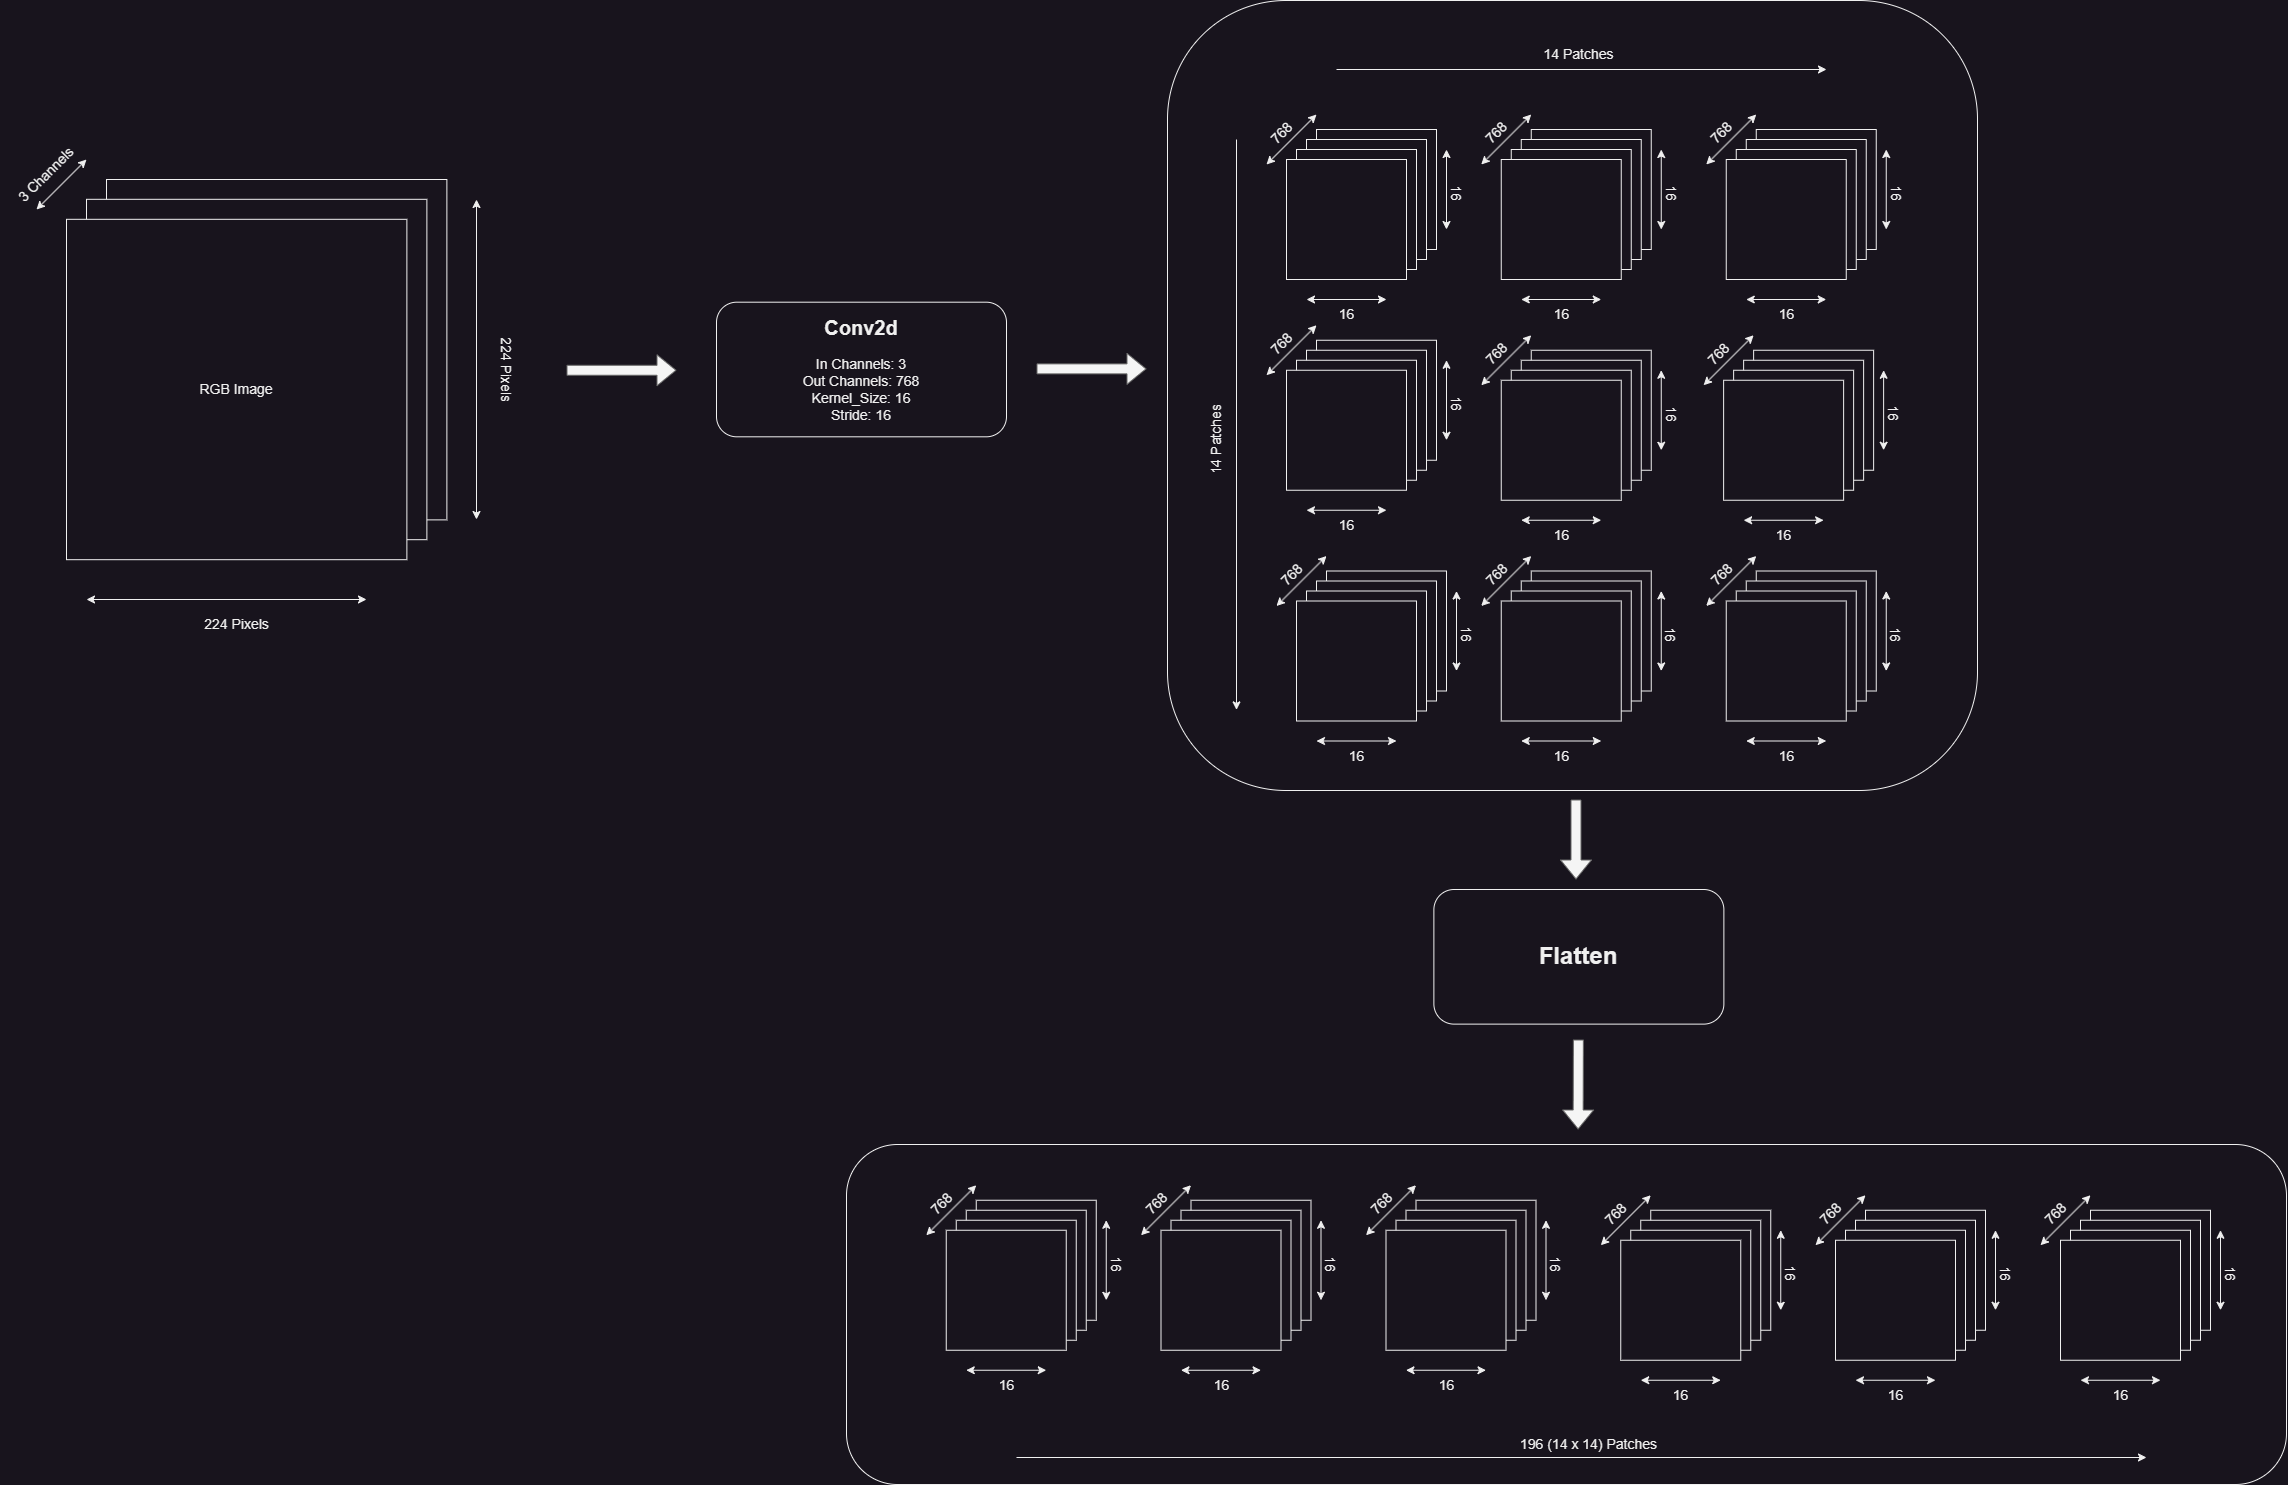

In [5]:
# Pass the image through the convolution layer
image_through_conv = conv_layer(random_image.unsqueeze(0))
print(f'Shape of embeddings through the conv layer -> {image_through_conv.shape} <- [batch_size, embedding_dims, num_of_patch_rows,num_patch_cols]') 

## We need to convert [1, 768, 14, 14] -> [1, 196, 768].

# Permute the dimensions of image_through_conv to match the expected shape
image_through_conv = image_through_conv.permute((0, 2, 3, 1)) # Permute just rearranges the dimension order!!  
# ==> Now we are going (B, NUM_PATCHROW, NUM_PATCHCOL , EMBEDDING_DIMS)

print(image_through_conv.shape)

# Create a flatten layer using nn.Flatten
flatten_layer = nn.Flatten(start_dim=1, end_dim=2)

# Pass the image_through_conv through the flatten layer
image_through_conv_and_flatten = flatten_layer(image_through_conv)

# Print the shape of the embedded image
print(f'Shape of embeddings through the flatten layer -> {list(image_through_conv_and_flatten.shape)} <- [batch_size, num_of_patches, embedding_dims]')

# Assign the embedded image to a variable
embedded_image = image_through_conv_and_flatten

## THIS GETS YOU THE EMBEDDED VECTOR FOR THAT IMAGE!!
# This has now converted the grid of patches into a single sequence of patches...

Shape of embeddings through the conv layer -> torch.Size([1, 768, 14, 14]) <- [batch_size, embedding_dims, num_of_patch_rows,num_patch_cols]
torch.Size([1, 14, 14, 768])
Shape of embeddings through the flatten layer -> [1, 196, 768] <- [batch_size, num_of_patches, embedding_dims]


In [6]:
#  Prepending the Class Token Embedding and Adding the Position Embeddings
class_token_embeddings = nn.Parameter(torch.rand((1, 1,EMBEDDING_DIMS), requires_grad  = True))
print(f'Shape of class_token_embeddings --> {list(class_token_embeddings.shape)} <-- [batch_size, 1, emdedding_dims]')

embedded_image_with_class_token_embeddings = torch.cat((class_token_embeddings, embedded_image), dim = 1)
print(f'\nShape of image embeddings with class_token_embeddings --> {list(embedded_image_with_class_token_embeddings.shape)} <-- [batch_size, num_of_patches+1, embeddiing_dims]')

position_embeddings = nn.Parameter(torch.rand((1, NUM_OF_PATCHES+1, EMBEDDING_DIMS ), requires_grad = True ))
print(f'\nShape of position_embeddings --> {list(position_embeddings.shape)} <-- [batch_size, num_patches+1, embeddings_dims]')

final_embeddings = embedded_image_with_class_token_embeddings + position_embeddings
print(f'\nShape of final_embeddings --> {list(final_embeddings.shape)} <-- [batch_size, num_patches+1, embeddings_dims]')

Shape of class_token_embeddings --> [1, 1, 768] <-- [batch_size, 1, emdedding_dims]

Shape of image embeddings with class_token_embeddings --> [1, 197, 768] <-- [batch_size, num_of_patches+1, embeddiing_dims]

Shape of position_embeddings --> [1, 197, 768] <-- [batch_size, num_patches+1, embeddings_dims]

Shape of final_embeddings --> [1, 197, 768] <-- [batch_size, num_patches+1, embeddings_dims]


#### Put the PatchEmbedddingLayer Together

In [5]:
class PatchEmbeddingLayer(nn.Module):
    def __init__(self, in_channels, patch_size, embedding_dim,):
        super().__init__()
        self.patch_size = patch_size
        self.embedding_dim = embedding_dim
        self.in_channels = in_channels
        self.conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=embedding_dim, kernel_size=patch_size, stride=patch_size)
        self.flatten_layer = nn.Flatten(start_dim=1, end_dim=2)

        self.class_token_embeddings = nn.Parameter(torch.rand((BATCH_SIZE, 1, EMBEDDING_DIMS), requires_grad=True))
        
        self.position_embeddings = nn.Parameter(torch.rand((1, NUM_OF_PATCHES + 1, EMBEDDING_DIMS), requires_grad=True))

    def forward(self, x):
        output = torch.cat((self.class_token_embeddings, self.flatten_layer(self.conv_layer(x).permute((0, 2, 3, 1)))), dim=1) + self.position_embeddings
        return output

In [8]:
patch_embedding_layer = PatchEmbeddingLayer(in_channels=IMAGE_CHANNELS, patch_size=PATCH_SIZE, embedding_dim=IMAGE_CHANNELS * PATCH_SIZE ** 2)

patch_embeddings = patch_embedding_layer(random_images)
patch_embeddings.shape

torch.Size([32, 197, 768])

In [40]:
summary(model=patch_embedding_layer,
        input_size=(BATCH_SIZE, 3, 224, 224), # (batch_size, input_channels, img_width, img_height)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

KeyboardInterrupt: 

### Step 5: Add MSA (Multi head self attention) BLock

In [6]:
class MultiHeadSelfAttentionBlock(nn.Module):
  def __init__(self,
               embedding_dims = 768, # Hidden Size D in the ViT Paper Table 1
               num_heads = 12,  # Heads in the ViT Paper Table 1
               attn_dropout = 0.0 # Default to Zero as there is no dropout for the the MSA Block as per the ViT Paper
               ):
    super().__init__()

    self.embedding_dims = embedding_dims
    self.num_head = num_heads
    self.attn_dropout = attn_dropout

    self.layernorm = nn.LayerNorm(normalized_shape = embedding_dims)

    self.multiheadattention =  nn.MultiheadAttention(num_heads = num_heads,
                                                     embed_dim = embedding_dims,
                                                     dropout = attn_dropout,
                                                     batch_first = True,
                                                    )

  def forward(self, x):
    x = self.layernorm(x)
    output,_ = self.multiheadattention(query=x, key=x, value=x,need_weights=False)
    return output

In [10]:
multihead_self_attention_block = MultiHeadSelfAttentionBlock(embedding_dims = EMBEDDING_DIMS,
                                                             num_heads = 12
                                                             )
print(f'Shape of the input Patch Embeddings => {list(patch_embeddings.shape)} <= [batch_size, num_patches+1, embedding_dims ]')
print(f'Shape of the output from MSA Block => {list(multihead_self_attention_block(patch_embeddings).shape)} <= [batch_size, num_patches+1, embedding_dims ]')

Shape of the input Patch Embeddings => [32, 197, 768] <= [batch_size, num_patches+1, embedding_dims ]
Shape of the output from MSA Block => [32, 197, 768] <= [batch_size, num_patches+1, embedding_dims ]


### Step 6: Creating the MLP
- Uses GeLU and Dropout 

In [7]:
class MachineLearningPerceptronBlock(nn.Module):
  def __init__(self, embedding_dims, mlp_size, mlp_dropout):
    super().__init__()
    self.embedding_dims = embedding_dims
    self.mlp_size = mlp_size
    self.dropout = mlp_dropout

    self.layernorm = nn.LayerNorm(normalized_shape = embedding_dims)
    self.mlp = nn.Sequential(
        nn.Linear(in_features = embedding_dims, out_features = mlp_size),
        nn.GELU(),
        nn.Dropout(p = mlp_dropout),
        nn.Linear(in_features = mlp_size, out_features = embedding_dims),
        nn.Dropout(p = mlp_dropout)
    )

  def forward(self, x):
    return self.mlp(self.layernorm(x))

In [12]:
mlp_block = MachineLearningPerceptronBlock(embedding_dims = EMBEDDING_DIMS,
                                           mlp_size = 3072,
                                           mlp_dropout = 0.1)

summary(model=mlp_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
MachineLearningPerceptronBlock (MachineLearningPerceptronBlock)   [1, 197, 768]        [1, 197, 768]        --                   True
├─LayerNorm (layernorm)                                           [1, 197, 768]        [1, 197, 768]        1,536                True
├─Sequential (mlp)                                                [1, 197, 768]        [1, 197, 768]        --                   True
│    └─Linear (0)                                                 [1, 197, 768]        [1, 197, 3072]       2,362,368            True
│    └─GELU (1)                                                   [1, 197, 3072]       [1, 197, 3072]       --                   --
│    └─Dropout (2)                                                [1, 197, 3072]       [1, 197, 3072]       --                   --
│    └─Linear (3)                                            

In [8]:
### Step 7: Transformer block!!
class TransformerBlock(nn.Module):
  def __init__(self, embedding_dims = 768,
               mlp_dropout=0.1,
               attn_dropout=0.0,
               mlp_size = 3072,
               num_heads = 12,
               ):
    super().__init__()

    self.msa_block = MultiHeadSelfAttentionBlock(embedding_dims = embedding_dims,
                                                 num_heads = num_heads,
                                                 attn_dropout = attn_dropout)

    self.mlp_block = MachineLearningPerceptronBlock(embedding_dims = embedding_dims,
                                                    mlp_size = mlp_size,
                                                    mlp_dropout = mlp_dropout,
                                                    )

  def forward(self,x):
    x = self.msa_block(x) + x
    x = self.mlp_block(x) + x

    return x

In [14]:
## Testing it
transformer_block = TransformerBlock(embedding_dims = EMBEDDING_DIMS,
                                     mlp_dropout = 0.1,
                                     attn_dropout=0.0,
                                     mlp_size = 3072,
                                     num_heads = 12)

print(f'Shape of the input Patch Embeddings => {list(patch_embeddings.shape)} <= [batch_size, num_patches+1, embedding_dims ]')
print(f'Shape of the output from Transformer Block => {list(transformer_block(patch_embeddings).shape)} <= [batch_size, num_patches+1, embedding_dims ]')

Shape of the input Patch Embeddings => [32, 197, 768] <= [batch_size, num_patches+1, embedding_dims ]
Shape of the output from Transformer Block => [32, 197, 768] <= [batch_size, num_patches+1, embedding_dims ]


In [15]:
summary(model=transformer_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerBlock (TransformerBlock)                [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiHeadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layernorm)                       [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multiheadattention)     --                   [1, 197, 768]        2,362,368            True
├─MachineLearningPerceptronBlock (mlp_block)       [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layernorm)                       [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

# Step 8: Creating the ViT Model - Run evertything here!!

In [10]:
import torch
from torch import nn
from torchinfo import summary

BATCH_SIZE = 32
PATCH_SIZE = 16
IMAGE_WIDTH = 224
IMAGE_HEIGHT = IMAGE_WIDTH
IMAGE_CHANNELS = 3
EMBEDDING_DIMS = IMAGE_CHANNELS * PATCH_SIZE**2 # 16 * 16 * 3 = 768
NUM_OF_PATCHES = int((IMAGE_WIDTH * IMAGE_HEIGHT) / PATCH_SIZE**2)
print(EMBEDDING_DIMS, NUM_OF_PATCHES)
class PatchEmbeddingLayer(nn.Module):
    def __init__(self, in_channels, patch_size, embedding_dim,):
        super().__init__()
        self.patch_size = patch_size
        self.embedding_dim = embedding_dim
        self.in_channels = in_channels
        self.conv_layer = nn.Conv2d(in_channels=in_channels, out_channels=embedding_dim, kernel_size=patch_size, stride=patch_size)
        self.flatten_layer = nn.Flatten(start_dim=1, end_dim=2)

        self.class_token_embeddings = nn.Parameter(torch.rand((BATCH_SIZE, 1, EMBEDDING_DIMS), requires_grad=True))
        
        self.position_embeddings = nn.Parameter(torch.rand((1, NUM_OF_PATCHES + 1, EMBEDDING_DIMS), requires_grad=True))

    def forward(self, x):
        output = torch.cat((self.class_token_embeddings, self.flatten_layer(self.conv_layer(x).permute((0, 2, 3, 1)))), dim=1) + self.position_embeddings
        return output

768 196


In [11]:
## Step 8: Creating ViT model!!
## Just combining everything we've done
# https://www.v7labs.com/blog/vision-transformer-guide has a very nice gif overview

## Notice, I'm pretty sure ViT's are encoder only architectures!!
## Initial params are base model size!!
### Step 7: Transformer block!!
class MultiHeadSelfAttentionBlock(nn.Module):
  def __init__(self,
               embedding_dims = 768, # Hidden Size D in the ViT Paper Table 1
               num_heads = 12,  # Heads in the ViT Paper Table 1
               attn_dropout = 0.0 # Default to Zero as there is no dropout for the the MSA Block as per the ViT Paper
               ):
    super().__init__()

    self.embedding_dims = embedding_dims
    self.num_head = num_heads
    self.attn_dropout = attn_dropout

    self.layernorm = nn.LayerNorm(normalized_shape = embedding_dims)

    self.multiheadattention =  nn.MultiheadAttention(num_heads = num_heads,
                                                     embed_dim = embedding_dims,
                                                     dropout = attn_dropout,
                                                     batch_first = True,
                                                    )

  def forward(self, x):
    x = self.layernorm(x)
    output,_ = self.multiheadattention(query=x, key=x, value=x,need_weights=False)
    return output
  

class MachineLearningPerceptronBlock(nn.Module):
  def __init__(self, embedding_dims, mlp_size, mlp_dropout):
    super().__init__()
    self.embedding_dims = embedding_dims
    self.mlp_size = mlp_size
    self.dropout = mlp_dropout

    self.layernorm = nn.LayerNorm(normalized_shape = embedding_dims)
    self.mlp = nn.Sequential(
        nn.Linear(in_features = embedding_dims, out_features = mlp_size),
        nn.GELU(),
        nn.Dropout(p = mlp_dropout),
        nn.Linear(in_features = mlp_size, out_features = embedding_dims),
        nn.Dropout(p = mlp_dropout)
    )

  def forward(self, x):
    return self.mlp(self.layernorm(x))

# https://aws.amazon.com/what-is/transformers-in-artificial-intelligence/#:~:text=Each%20transformer%20block%20has%20two,the%20input%20when%20making%20predictions.
class TransformerBlock(nn.Module):
  def __init__(self, embedding_dims = 768,
               mlp_dropout=0.1,
               attn_dropout=0.0,
               mlp_size = 3072,
               num_heads = 12,
               ):
    super().__init__()

    self.msa_block = MultiHeadSelfAttentionBlock(embedding_dims = embedding_dims,
                                                 num_heads = num_heads,
                                                 attn_dropout = attn_dropout)

    self.mlp_block = MachineLearningPerceptronBlock(embedding_dims = embedding_dims,
                                                    mlp_size = mlp_size,
                                                    mlp_dropout = mlp_dropout,
                                                    )

  def forward(self,x):
    x = self.msa_block(x) + x
    x = self.mlp_block(x) + x

    return x
  
class ViT(nn.Module):
  def __init__(self, img_size = 224,
               in_channels = 3,
               patch_size = 16,
               embedding_dims = 768,
               num_transformer_layers = 12, # from table 1 above
               mlp_dropout = 0.1,
               attn_dropout = 0.0,
               mlp_size = 3072,
               num_heads = 12,
               num_classes = 1000):
    super().__init__()

    ## Get the patch layer.
    self.patch_embedding_layer = PatchEmbeddingLayer(in_channels = in_channels,
                                                     patch_size=patch_size,
                                                     embedding_dim = embedding_dims)

    # Throw it in the encoder
    # ViT's are encoder only architectures!! (I think)!!
    # The * unpacks the list generated from list comprehension, to instead be a ton of params for Sequential e.g Sequential(tb1, tb2, tb3, tb...).
    self.transformer_encoder = nn.Sequential(*[TransformerBlock(embedding_dims = embedding_dims,
                                              mlp_dropout = mlp_dropout,
                                              attn_dropout = attn_dropout,
                                              mlp_size = mlp_size,
                                              num_heads = num_heads) for _ in range(num_transformer_layers)])


    # Classify it
    # eq 4 if the ViT paper 2020
    self.classifier = nn.Sequential(nn.LayerNorm(normalized_shape = embedding_dims),
                                    nn.Linear(in_features = embedding_dims,
                                              out_features = num_classes))

  def forward(self, x):
    # Get patch embeddings from the image
    patches = self.patch_embedding_layer(x)
    
    # Pass the patch embeddings through the transformer encoder
    encoded_patches = self.transformer_encoder(patches)
    
    # Extract the CLS token (the first token in the sequence)
    cls_token = encoded_patches[:, 0]
    
    # Pass the CLS token through the classifier for final output
    output = self.classifier(cls_token)
    
    return output

In [14]:
vit = ViT(num_classes=2)
summary(model=vit,
        input_size=(BATCH_SIZE, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                                    [32, 3, 224, 224]    [32, 2]              --                   True
├─PatchEmbeddingLayer (patch_embedding_layer)                [32, 3, 224, 224]    [32, 197, 768]       175,872              True
│    └─Conv2d (conv_layer)                                   [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
│    └─Flatten (flatten_layer)                               [32, 14, 14, 768]    [32, 196, 768]       --                   --
├─Sequential (transformer_encoder)                           [32, 197, 768]       [32, 197, 768]       --                   True
│    └─TransformerBlock (0)                                  [32, 197, 768]       [32, 197, 768]       --                   True
│    │    └─MultiHeadSelfAttentionBlock (msa_block)          [32, 197, 768]       [32, 197, 76

## Optimisers, loss function and training!!

In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

train_dir = "./ADNI/AD_NC/train"
test_dir = "./ADNI/AD_NC/test"


mean = torch.Tensor([0.1156, 0.1156, 0.1156]) 
std =  torch.Tensor([0.2229, 0.2229, 0.2229])
# Define batch size
BATCH_SIZE = 32  # You can adjust this based on your GPU memory
num_workers = 4
image_size = 224
train_fraction = 0.9 # What percentage is used for training vs validation (0.9 is 90%).

data_transforms = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.RandomHorizontalFlip(), # For augmentation and better generalisation
    transforms.RandomRotation(degrees=10),  # Random rotation between -10 and +10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std) # Mean and std from previous cell
])



# Load the full train dataset
train_data = datasets.ImageFolder(root=train_dir, transform=data_transforms)

# Split the train_data into training and validation datasets
train_size = int(train_fraction * len(train_data))  
val_size = len(train_data) - train_size  
train_dataset, val_dataset = random_split(train_data, [train_size, val_size])

# Load the test dataset (no splitting needed for test)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transforms)

# Create DataLoaders for the training, validation, and test datasets
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers)

# Val/test dataloaders
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)  # No need to shuffle validation set
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)

# Check dataset sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_data)}")

# Shuffle not needed for test because we aren't training on it. Shuffle is mainly used because, imagine if you had all your 0 classifications in the beginning and the dataloader ate this. You're feeding the NN hundreds of entire "0s" that it's going to backprop in this direction, instead of an 'unbiased sample'. This can affect how well it learns. Shuffling helps better convergence, and generalisation.

Training set size: 19368
Validation set size: 2152
Test set size: 9000


In [4]:
len(train_loader), train_loader.batch_size

for images, label in train_loader:
    print(images.shape)

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size

In [61]:
# Function to train for one epoch
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    batch_losses = []

    for (i, (images, labels)) in enumerate(dataloader):
        # Move data to device (GPU or CPU)
        images = images.to(device)
        labels = labels.to(device)

        # Zero gradients so we don't update wrongly

        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track loss and accuracy
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0) # Each batch size, except for potentially the last batch if it's not divisible by batch size yknow.
        correct += (predicted == labels).sum().item()

        ## Should we print batch loss data hmm
        if (i + 1) % 10 == 0:  # Print every 10 batches
            print(f"Batch {i+1}, Avg Loss: {loss.item():.4f}, Correct Predictions: {correct}")
            batch_losses.append(loss.item())  # Append batch loss to list
        
            break



    # Return average loss and accuracy
    avg_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy, batch_losses

# Function to evaluate on validation data
def evaluate(model, dataloader, criterion, device):
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    total_correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation for evaluation
        for (i, (images, labels)) in enumerate(dataloader):
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Track loss and accuracy
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()

            ## Should we print batch loss data hmm
            if (i + 1) % 10 == 0:  # Print every 10 batches
                print(f"Validation Batch {i+1}, Avg Loss: {loss.item():.4f}, Correct Predictions: {total_correct}")
                break



    # Return average loss and accuracy
    avg_loss = running_loss / len(dataloader) # Divide by length of dataloder, since running loss is for each batch. Avg loss is AVERAGE BATCH LOSS (over one epoch)!!
    accuracy = 100 * total_correct / total
    return avg_loss, accuracy

# Function to save model checkpoints
def save_model_checkpoint(model, optimizer, epoch, val_accuracy, path="best_model.pth"):
    # Format the save path to include epoch and validation accuracy
    save_path = f"model_epoch_{epoch+1}_valacc_{val_accuracy:.2f}.pth"
    
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, save_path)
    
    print(f"Model saved at epoch {epoch+1} with validation accuracy {val_accuracy:.2f}% at {save_path}")

In [62]:

# Function for full training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    best_val_loss = float('inf')

    # Lists to store training/validation loss and accuracy for each epoch
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    # Optional but I like
    all_batch_losses = []  # List to store batch losses for all epochs

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")

        # Train for one epoch
        train_loss, train_accuracy, batch_losses = train_one_epoch(model, train_loader, optimizer, criterion, device)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        all_batch_losses.extend(batch_losses)
        print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

        # Evaluate on validation set each epoch
        val_loss, val_accuracy = evaluate(model, val_loader, criterion, device)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

        # Save the model if it has the best validation loss
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            save_model_checkpoint(model, optimizer, epoch, val_accuracy)

    print("Training complete")
    # Return losses and accuracies for plotting
    return train_losses, train_accuracies, val_losses, val_accuracies, all_batch_losses

In [63]:
 # Train the model
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vit.parameters(), lr=0.001)


train_losses, train_accuracies, val_losses, val_accuracies, all_batch_losses = train_model(vit, train_loader, val_loader, criterion, optimizer, num_epochs=5, device=device)


Epoch 1/5
Batch 10, Avg Loss: 0.6910, Correct Predictions: 144
Training Loss: 0.0117, Training Accuracy: 45.00%
Validation Batch 10, Avg Loss: 0.6948, Correct Predictions: 146
Validation Loss: 0.1020, Validation Accuracy: 45.62%
Model saved at epoch 1 with validation accuracy 45.62% at model_epoch_1_valacc_45.62.pth
Epoch 2/5
Batch 10, Avg Loss: 0.6866, Correct Predictions: 169
Training Loss: 0.0115, Training Accuracy: 52.81%
Validation Batch 10, Avg Loss: 0.6854, Correct Predictions: 174
Validation Loss: 0.1014, Validation Accuracy: 54.38%
Model saved at epoch 2 with validation accuracy 54.38% at model_epoch_2_valacc_54.38.pth
Epoch 3/5
Batch 10, Avg Loss: 0.6820, Correct Predictions: 174
Training Loss: 0.0114, Training Accuracy: 54.38%
Validation Batch 10, Avg Loss: 0.6865, Correct Predictions: 174
Validation Loss: 0.1015, Validation Accuracy: 54.38%
Epoch 4/5
Batch 10, Avg Loss: 0.7126, Correct Predictions: 151
Training Loss: 0.0116, Training Accuracy: 47.19%
Validation Batch 10, Av

In [67]:
#### Evaluate on test loader
# Assuming your test loader is ready (e.g., `test_loader`)
test_loss, test_accuracy = evaluate(vit, test_loader, criterion, device)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Validation Batch 10, Avg Loss: 0.8327, Correct Predictions: 0
Test Loss: 0.0295, Test Accuracy: 0.00%


In [64]:
import matplotlib.pyplot as plt

# Function to plot loss over epochs
def plot_losses(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Time')
    plt.legend()
    plt.show()

# Function to plot accuracy over epochs
def plot_accuracies(train_accuracies, val_accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Validation Accuracy Over Time')
    plt.legend()
    plt.show()

# Function to plot batch losses (optional, if tracking per batch)
def plot_batch_losses(all_batch_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(all_batch_losses, label='Batch Loss')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Batch Loss Over Time')
    plt.show()


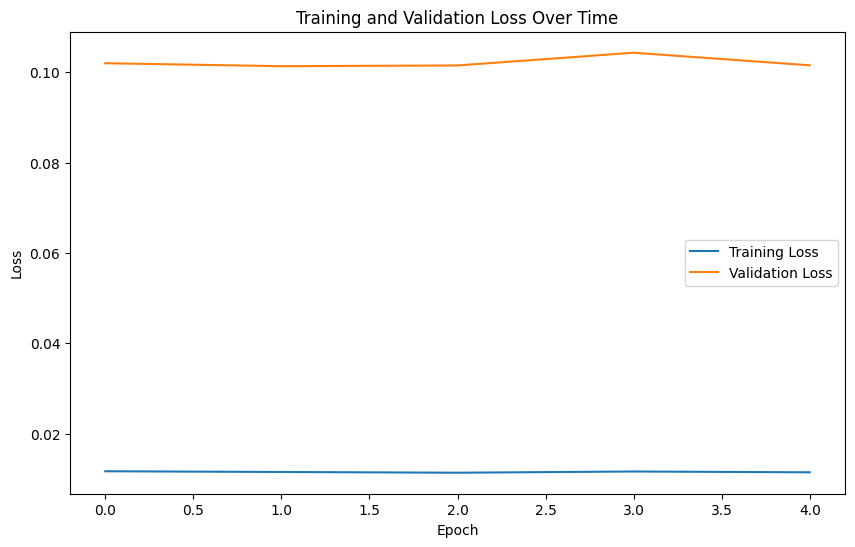

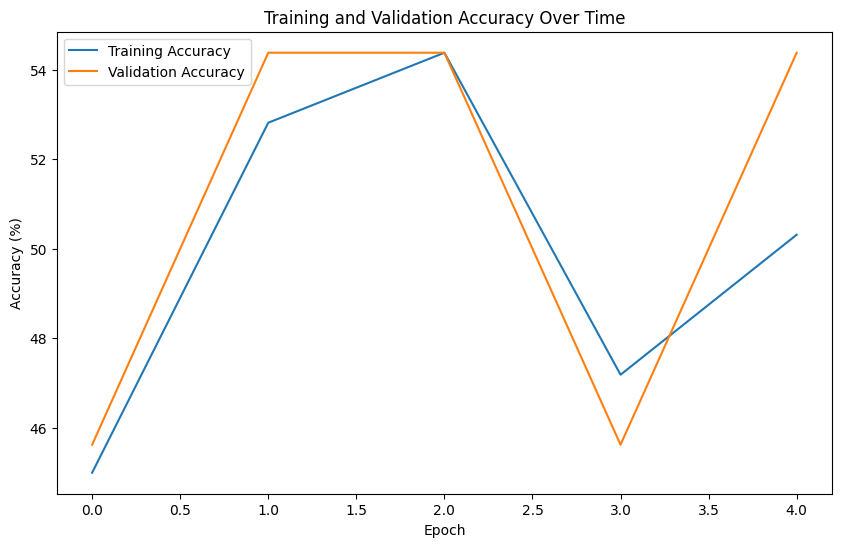

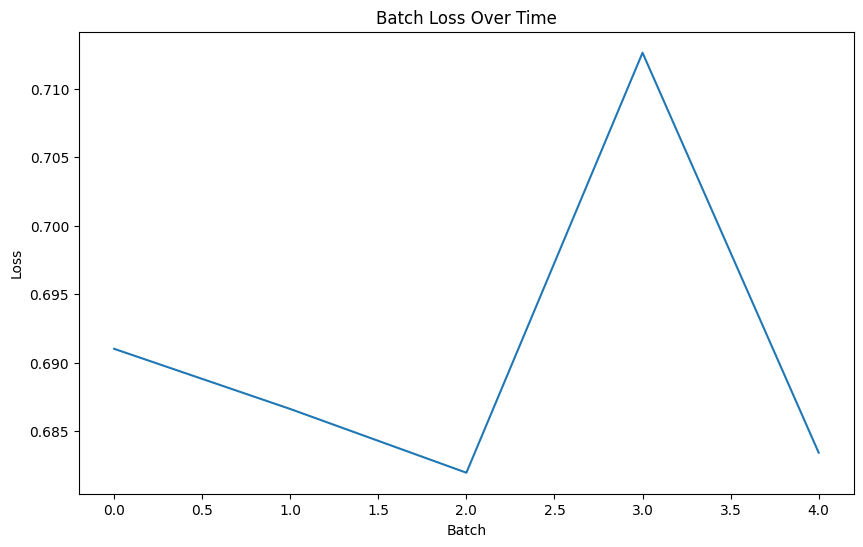

[0.011678666466533547, 0.011515274791434259, 0.01135233959349075, 0.011625395061159291, 0.011442736430530108]


In [66]:
# Plot losses and accuracies
plot_losses(train_losses, val_losses)
plot_accuracies(train_accuracies, val_accuracies)

# Optional: Plot batch losses
plot_batch_losses(all_batch_losses)
print(train_losses)